In [41]:
import matplotlib.pyplot as plt

def plot_tree(base, context):
    """
    Plot a tree using matplotlib.
    """
    fig, ax = plt.subplots()
    ax.axis('off')

    # Node positions
    positions = {
        "Food\nChoice": (0, 0),  # ROOT
        "Healthy": (-2, -0.5),  # CHOICE
        "High-fat\nprocessed\nfood": (5, -0.5),  # CHOICE
        "Health": (-10, -1.5),  # VALUE
        "Enjoyment": (-7.3, -1.5),  # VALUE
        "Social\nacceptance": (-3.7, -1.5),  # VALUE
        "Wealth": (-1, -1.5),  # VALUE
        "Health\n(SD)": (2, -1.5),  # VALUE
        "Enjoyment\n(SD)": (5, -1.5),  # VALUE
        "Social\nacceptance\n(SD)": (8, -1.5),  # VALUE
        "Wealth\n(SD)": (11, -1.5),  # VALUE
        "Eating\nOut": (2, -2.5)  # CONTEXT
    }

    # Draw edges
    edges = [
        ("Food\nChoice", "Healthy", None),
        ("Food\nChoice", "High-fat\nprocessed\nfood", None),
        ("Healthy", "Health", base[0]),
        ("Healthy", "Enjoyment", base[1]),
        ("Healthy", "Social\nacceptance", base[2]),
        ("Healthy", "Wealth", base[3]),
        ("High-fat\nprocessed\nfood", "Health\n(SD)", -base[0]),
        ("High-fat\nprocessed\nfood", "Enjoyment\n(SD)", -base[1]),
        ("High-fat\nprocessed\nfood", "Social\nacceptance\n(SD)", -base[2]),
        ("High-fat\nprocessed\nfood", "Wealth\n(SD)", -base[3]),
        ("Eating\nOut", "Health", context[0]),
        ("Eating\nOut", "Enjoyment", context[1]),
        ("Eating\nOut", "Social\nacceptance", context[2]),
        ("Eating\nOut", "Wealth", context[3]),
        ("Eating\nOut", "Health\n(SD)", -context[0]),
        ("Eating\nOut", "Enjoyment\n(SD)", -context[1]),
        ("Eating\nOut", "Social\nacceptance\n(SD)", -context[2]),
        ("Eating\nOut", "Wealth\n(SD)", -context[3])
    ]


    for edge in edges:
        start_pos = positions[edge[0]]
        end_pos = positions[edge[1]]
        weight = edge[2]

        if weight is not None:
            x_offset = 0.05 * (end_pos[0] - start_pos[0]) + 0.7
            y_offset = 0.05 * (end_pos[1] - start_pos[1])
            ax.text((start_pos[0] + end_pos[0]) / 2 + x_offset, (start_pos[1] + end_pos[1]) / 2 + y_offset, weight, ha='center', va='center')

        ax.plot([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]], 'k-', linewidth=2)

    # Draw nodes
    node_size = 0.2

    for label, pos in positions.items():
        ax.text(pos[0], pos[1], label, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='circle'), fontsize=8)

    plt.show()


In [42]:
def convert_likert_to_range(likert_value):
    # Mapping of Likert scale values to the corresponding range
    scale_mapping = {
        1: -10,
        2: -5,
        3: 0,
        4: 5,
        5: 10
    }

    return scale_mapping[likert_value]

def calculate_differences(base, context):
    # Check if the lengths of the arrays are the same

    differences = []
    for i in range(len(base)):
        diff = convert_likert_to_range(context[i]) - convert_likert_to_range(base[i])
        differences.append(diff)

    return differences



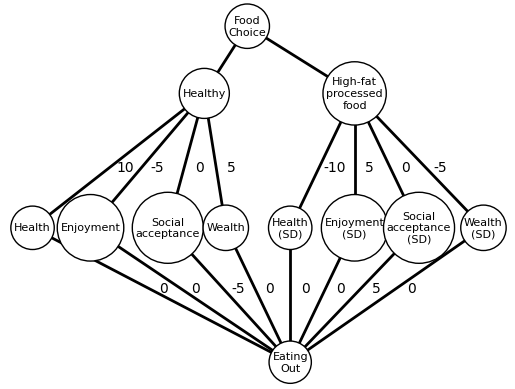

In [43]:
base = [5, 2, 3, 4]
context = [5, 2, 2, 4]

plot_tree([convert_likert_to_range(val) for val in base], calculate_differences(base, context))